In [309]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = 'dataset.xlsx'
df = pd.ExcelFile(file_path)

# List the sheet names
df.sheet_names

['clean_df.csv']

In [310]:
# Load the dataset
df = pd.read_excel(file_path, sheet_name='clean_df.csv')

# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,Price,Location,Bedroom,Bathroom,Carport,Land,Building,Month,City/Regency,Latitude,Longitude
0,0,1.600000e+09,Padalarang,2,1.0,1.0,72.0,50.0,8.0,West Bandung Regency,-6.843600,107.478400
1,1,8.500000e+08,Parongpong,2,1.0,1.0,70.0,80.0,8.0,West Bandung Regency,-6.803228,107.581804
2,2,8.750000e+08,Buah Batu,3,2.0,1.0,60.0,70.0,8.0,Bandung City,-6.965549,107.637926
3,3,1.750000e+09,Bojongsoang,2,3.0,1.0,90.0,94.0,8.0,Bandung Regency,-6.993945,107.643700
4,4,4.900000e+09,Bojongloa Kidul,4,4.0,0.0,200.0,300.0,8.0,Bandung City,-6.947036,107.596271


# **Exploratory Data Analysis (EDA)**

In [311]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32536 entries, 0 to 32535
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    32536 non-null  int64  
 1   Price         32536 non-null  float64
 2   Location      32527 non-null  object 
 3   Bedroom       32536 non-null  int64  
 4   Bathroom      32521 non-null  float64
 5   Carport       32521 non-null  float64
 6   Land          32533 non-null  float64
 7   Building      32527 non-null  float64
 8   Month         32527 non-null  float64
 9   City/Regency  32527 non-null  object 
 10  Latitude      32526 non-null  float64
 11  Longitude     32527 non-null  float64
dtypes: float64(8), int64(2), object(2)
memory usage: 3.0+ MB
None


In [312]:
print(df.describe())

# Checking missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

         Unnamed: 0         Price       Bedroom      Bathroom       Carport  \
count  32536.000000  3.253600e+04  32536.000000  32521.000000  32521.000000   
mean   25966.194308  2.554932e+09      3.524158      2.527721      1.052120   
std    15468.621566  1.879994e+09      1.235943      1.074318      0.796993   
min        0.000000  1.020000e+07      1.000000      1.000000      0.000000   
25%    12565.750000  1.200000e+09      3.000000      2.000000      0.000000   
50%    25392.000000  2.000000e+09      3.000000      2.000000      1.000000   
75%    39255.250000  3.365000e+09      4.000000      3.000000      2.000000   
max    53466.000000  9.700000e+09      8.000000      7.000000      3.000000   

               Land      Building         Month      Latitude     Longitude  
count  32533.000000  32527.000000  32527.000000  32526.000000  32527.000000  
mean     181.392002    179.397485      8.988533     -6.923486    107.625922  
std      107.491313    108.516303      0.821016      0

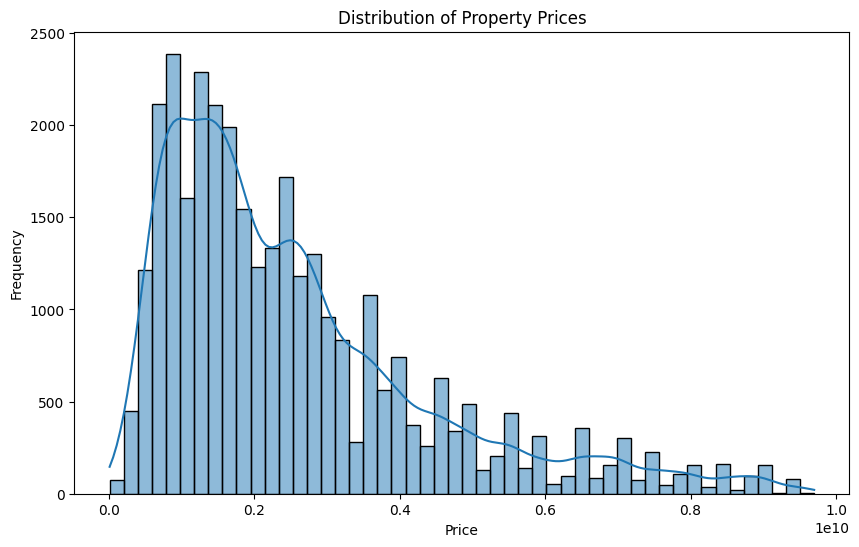

In [313]:
# Analyze the distribution of price
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], kde=True, bins=50)
plt.title("Distribution of Property Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

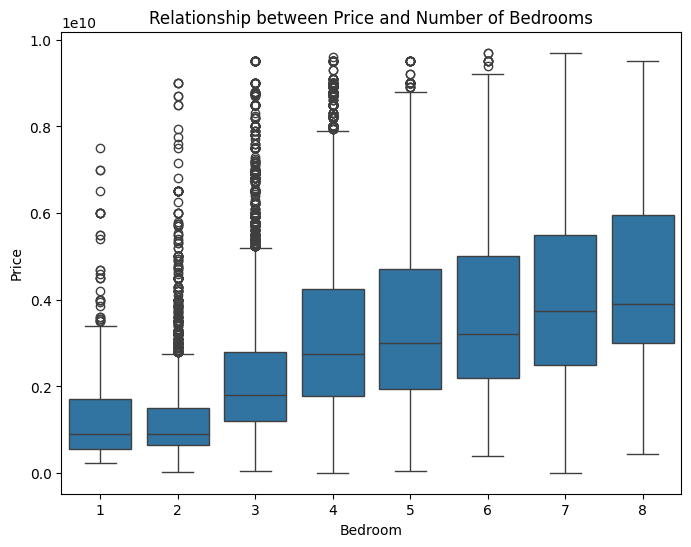

In [314]:
# Analyze the relationship between price and number of bedrooms
plt.figure(figsize=(8, 6))
sns.boxplot(x='Bedroom', y='Price', data=df)
plt.title("Relationship between Price and Number of Bedrooms")
plt.show()

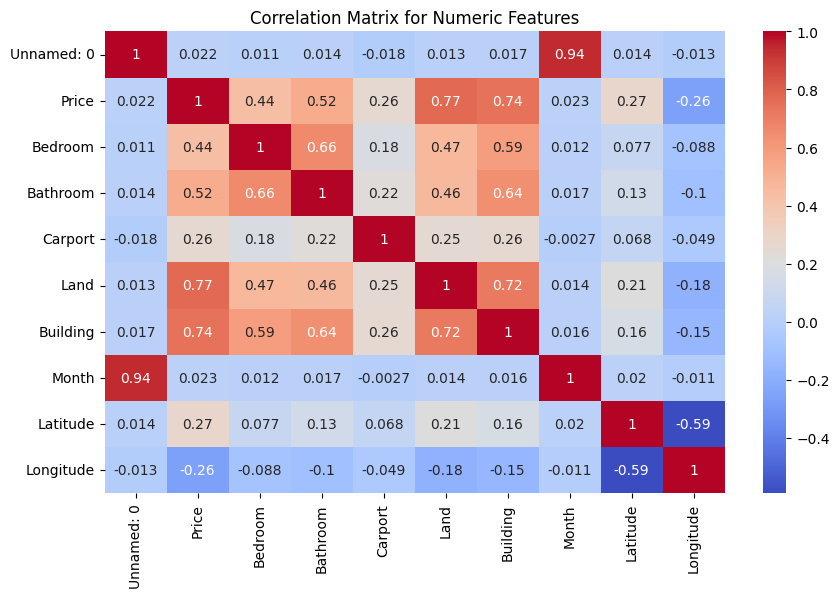

In [315]:
# Correlation heatmap between numerical variables
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix for Numeric Features")
plt.show()

# **Preprocessing and Feature Encoding**

In [316]:
#Drop unnecessary columns and handle missing values
df_clean = df.drop(columns=['Unnamed: 0', 'Latitude', 'Longitude'])
df_clean = df_clean.dropna()

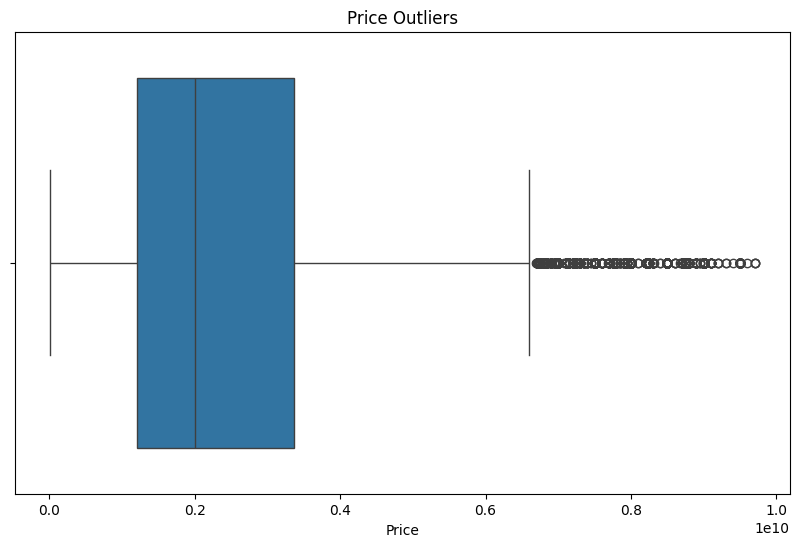

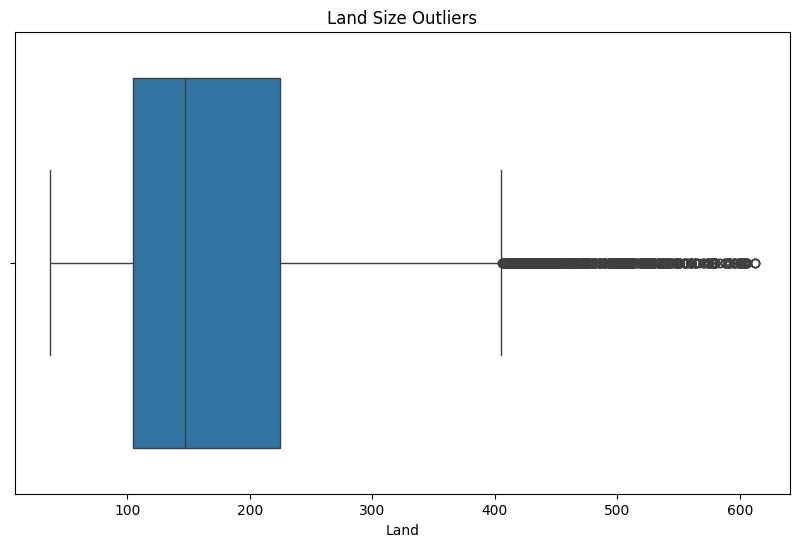

In [317]:
# Boxplot for Price Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'])
plt.title("Price Outliers")
plt.show()

# Boxplot for Land Size Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Land'])
plt.title("Land Size Outliers")
plt.show()

In [318]:
# Outlier Handling Using IQR Method
# Calculate IQR for the 'Price' column
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

In [319]:
# Define bounds for outliers
lower_bound = Q1 - 1 * IQR
upper_bound = Q3 + 1 * IQR

In [320]:
# Filter out outliers in the 'Price' column
df_filtered = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [321]:
# Check the remaining rows after outlier removal
print(f"Remaining rows after outlier removal: {df_filtered.shape[0]}")

Remaining rows after outlier removal: 29828


In [322]:
# Handling outliers for land size using the IQR method
Q1_land = df['Land'].quantile(0.25)
Q3_land = df['Land'].quantile(0.75)
IQR_land = Q3_land - Q1_land

In [323]:
# Define bounds for land size outliers
lower_bound_land = Q1_land - 1 * IQR_land
upper_bound_land = Q3_land + 1 * IQR_land

In [324]:
# Filter out land size outliers
df_filtered = df_filtered[(df_filtered['Land'] >= lower_bound_land) & (df_filtered['Land'] <= upper_bound_land)]

In [325]:
# Check the remaining rows after outlier removal
print(f"Remaining rows after outlier removal: {df_filtered.shape[0]}")

Remaining rows after outlier removal: 28371


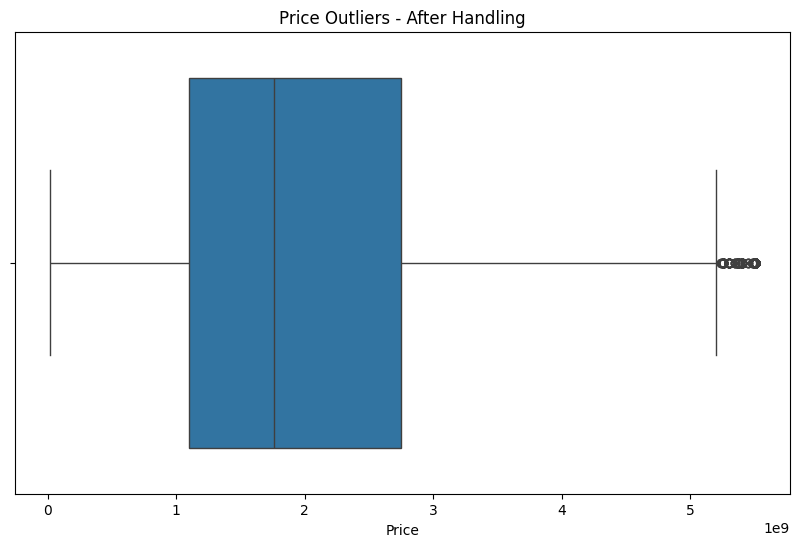

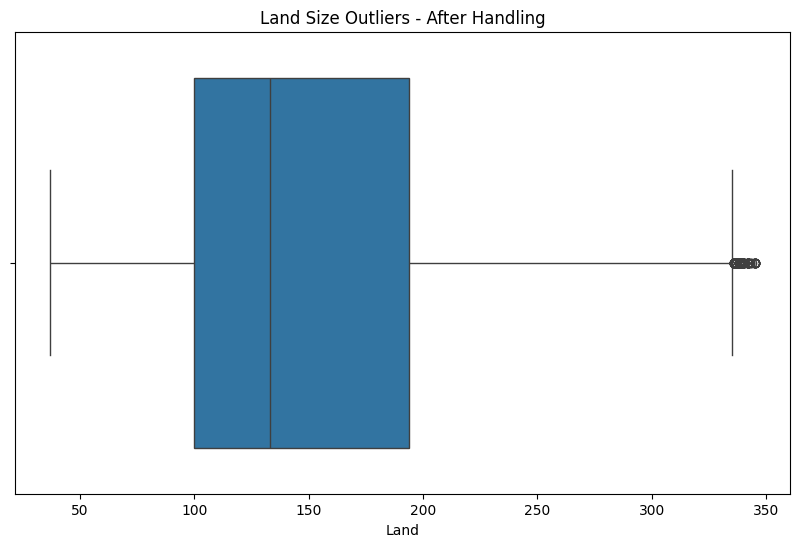

In [326]:
# Boxplot for Price (After outlier Handling)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['Price'])
plt.title("Price Outliers - After Handling")
plt.show()

# Boxplot for Land Size (After Outlier Handling)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['Land'])
plt.title("Land Size Outliers - After Handling")
plt.show()

In [327]:
# One-hot encode the 'Location' and 'City/Regency' columns
df_encoded = pd.get_dummies(df_clean, columns=['Location', 'City/Regency'], drop_first=True)


# **Build a Model**

In [328]:
# Split data into features (X) and target (y)
X = df_encoded.drop(columns=['Price'])
y = df_encoded['Price']

In [329]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [330]:
models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Decision Tree', DecisionTreeRegressor(random_state=42)))
models.append(('Random Forest', RandomForestRegressor(random_state=42)))

# Evaluate Each Model

results = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    results.append((name, mae, mse, rmse, r2))
    print(f"{name}:")
    print(f" Mean Absolute Error (MAE): {mae}")
    print(f" Mean Squared Error (MSE): {mse}")
    print(f" Root Mean Squared Error (RMSE): {rmse}")
    print(f" R-squared (R^2): {r2}")
    print("-"*30)

Linear Regression:
 Mean Absolute Error (MAE): 631371928.140951
 Mean Squared Error (MSE): 8.325771151273524e+17
 Root Mean Squared Error (RMSE): 912456637.3956367
 R-squared (R^2): 0.763186461847664
------------------------------
Decision Tree:
 Mean Absolute Error (MAE): 399509835.5311355
 Mean Squared Error (MSE): 7.059995642358651e+17
 Root Mean Squared Error (RMSE): 840237802.1940367
 R-squared (R^2): 0.7991894664134157
------------------------------
Random Forest:
 Mean Absolute Error (MAE): 353010661.8865679
 Mean Squared Error (MSE): 3.95211508644113e+17
 Root Mean Squared Error (RMSE): 628658499.2220442
 R-squared (R^2): 0.8875882678252344
------------------------------


The Random Forest model performs the best out of the three models:

Lowest Error:

MAE: IDR 353 million (lower than both Linear Regression and Decision Tree)

RMSE: IDR 628 million (better than other two)

Highest Accuracy:

R-squared (R²): 88.7% (Random Forest)

Random Forest has the lowest error and highest R², so it the most reliable for predicting property prices.

Key Insight:

Random Forest is the best choice for price prediction because it is more accurate and reliable results.

In [331]:
# Build a RandomForest Regressor model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# **Model Evaluation**

In [332]:
# Make predictions
y_pred = model.predict(X_test)

# Key Drivers of Price

                         Feature  Importance
3                           Land    0.619876
4                       Building    0.174092
0                        Bedroom    0.023595
56           Location_Padalarang    0.022512
1                       Bathroom    0.021479
2                        Carport    0.012221
14        Location_Bandung Wetan    0.010146
71  City/Regency_Bandung Regency    0.010144
43             Location_Gedebage    0.008067
68             Location_Sukasari    0.007359


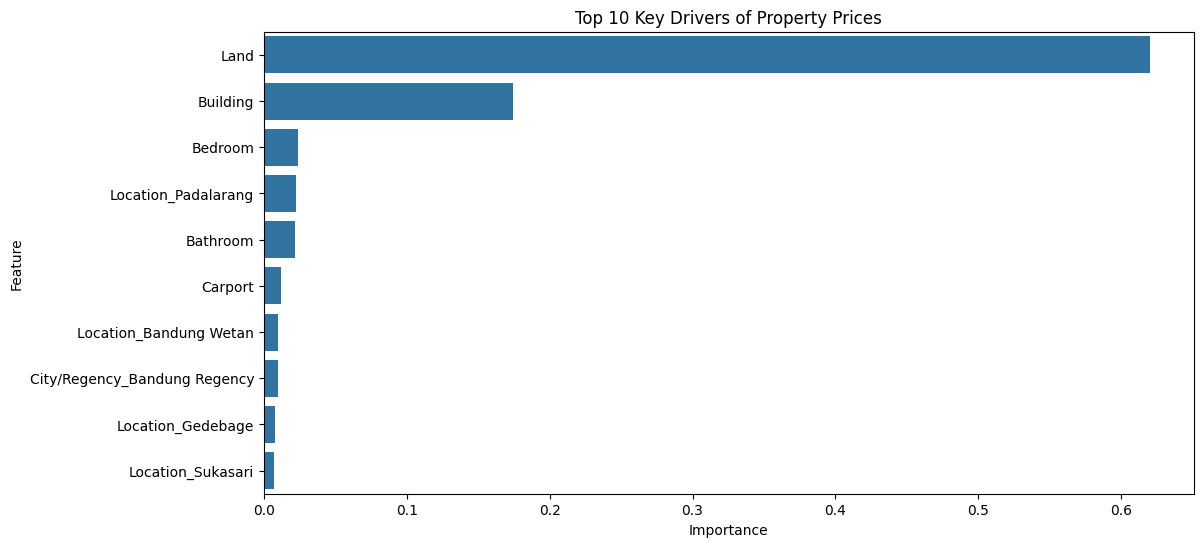

In [333]:
importances = model.feature_importances_
feature_names = X_train.columns

# Create dataframe for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top features impacting property prices
print(feature_importance_df.head(10))

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title("Top 10 Key Drivers of Property Prices")
plt.show()

# Location Analysis

In [334]:
# location price comparison
location_price_comparison

,City/Regency,Price
0,Bandung City,2.703378e+09
1,Bandung Regency,1.424505e+09
2,West Bandung Regency,3.187006e+09


Average Price in West Bandung Regency: 3187006235.49884
Average Price in Bandung City: 2703378169.9237466


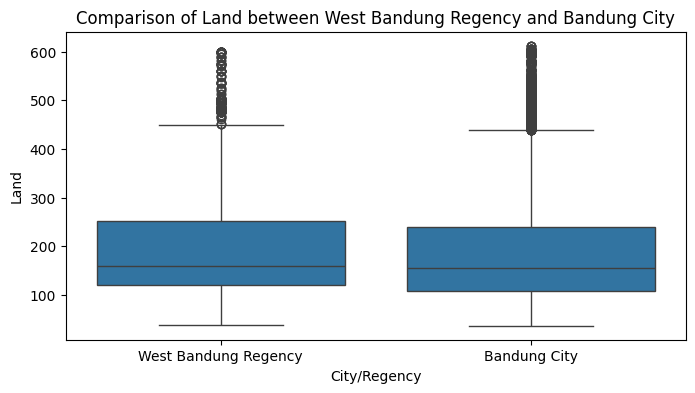

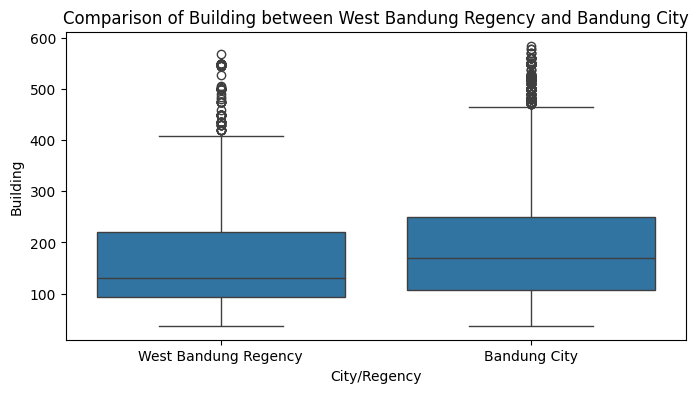

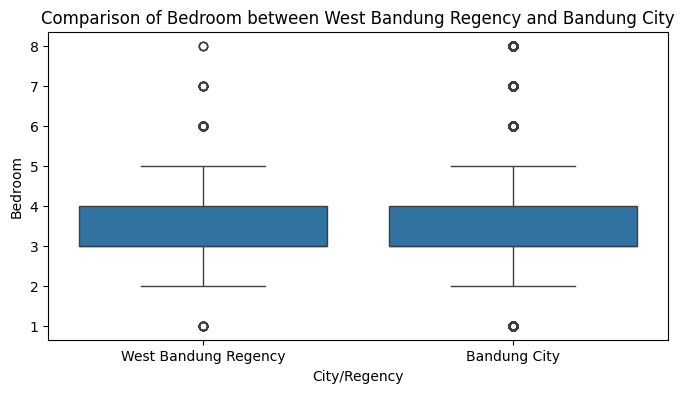

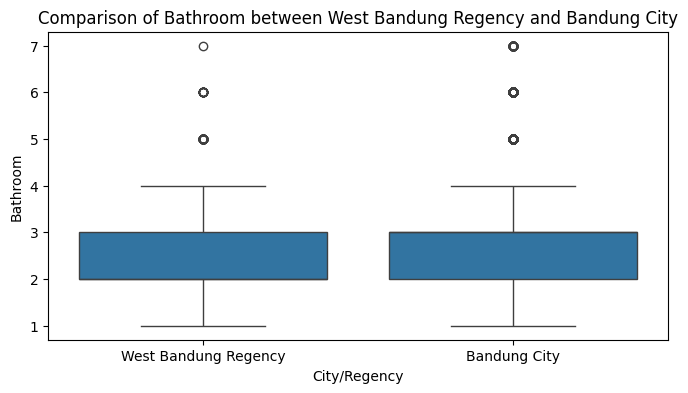

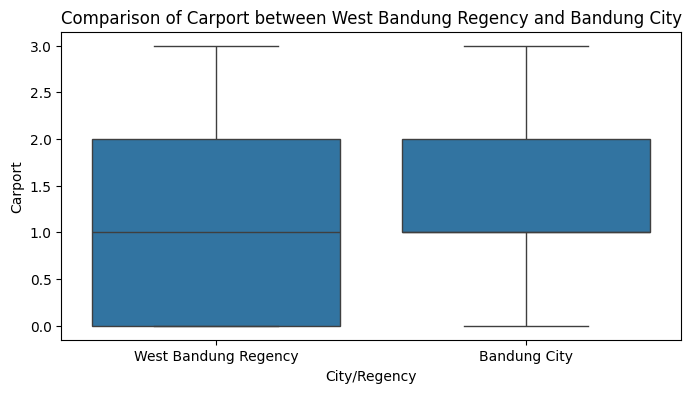

In [335]:
# Separate West Bandung Regency and Bandung City for comparison
west_bandung = df[df['City/Regency'] == 'West Bandung Regency']
bandung_city = df[df['City/Regency'] == 'Bandung City']

# Calculate average prices
west_bandung_avg_price = west_bandung['Price'].mean()
bandung_city_avg_price = bandung_city['Price'].mean()

print(f"Average Price in West Bandung Regency: {west_bandung_avg_price}")
print(f"Average Price in Bandung City: {bandung_city_avg_price}")

# Compare the features contributing to price differences
features_to_compare = ['Land', 'Building', 'Bedroom', 'Bathroom', 'Carport']

# Plot the comparison of features between West Bandung Regency and Bandung City
for feature in features_to_compare:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='City/Regency', y=feature, data=df[df['City/Regency'].isin(['West Bandung Regency', 'Bandung City'])])
    plt.title(f"Comparison of {feature} between West Bandung Regency and Bandung City")
    plt.show()

# Property Recommendations

Properties available under 1 billion IDR by location:
           City/Regency  Number of Properties
0          Bandung City                  4065
1       Bandung Regency                  1936
2  West Bandung Regency                   538

Summary of properties under 1 billion IDR:
              Price      Bedroom     Bathroom         Land     Building
count  6.539000e+03  6539.000000  6536.000000  6539.000000  6539.000000
mean   7.082342e+08     2.611103     1.571450    93.452669    80.443034
std    1.988233e+08     0.906456     0.678744    38.542742    39.905374
min    1.020000e+07     1.000000     1.000000    37.000000    37.000000
25%    5.800000e+08     2.000000     1.000000    72.000000    50.000000
50%    7.490000e+08     2.000000     1.000000    86.000000    70.000000
75%    8.700000e+08     3.000000     2.000000   105.000000   100.000000
max    9.990000e+08     8.000000     7.000000   567.000000   500.000000


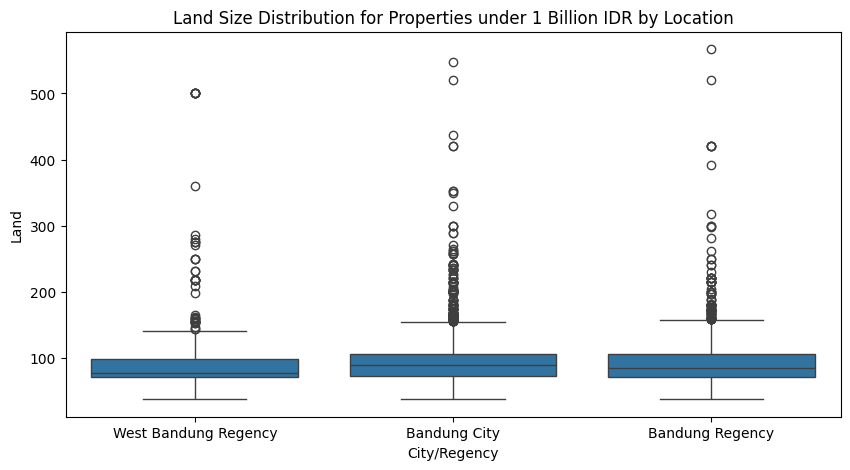

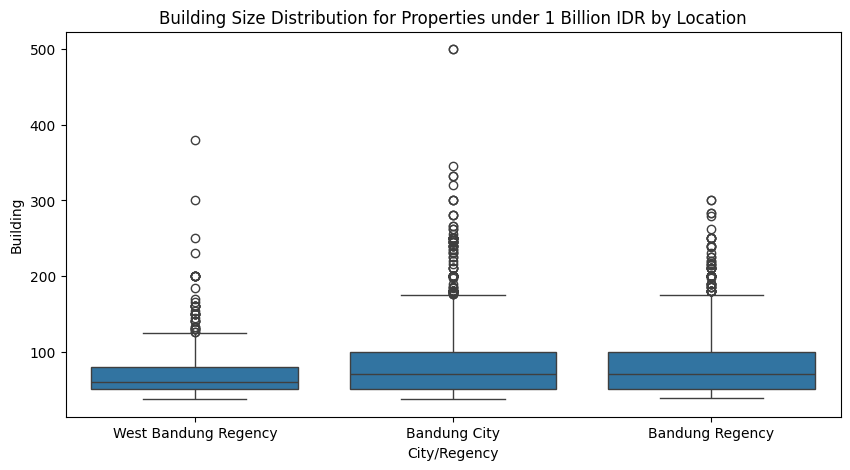


Top 5 recommended properties for investment:
             Price   Location          City/Regency  Bedroom  Bathroom   Land  \
1032   800000000.0  Rancaekek       Bandung Regency        6       2.0  567.0   
30015  950000000.0      Andir          Bandung City        5       3.0  548.0   
23215   12500000.0   Sukasari          Bandung City        4       2.0  520.0   
12168  920000000.0    Ciwidey       Bandung Regency        4       2.0  520.0   
3170   699000000.0    Lembang  West Bandung Regency        2       2.0  500.0   

       Building  
1032      240.0  
30015     281.0  
23215     250.0  
12168      75.0  
3170       98.0  


In [336]:
# For Budget Below 1 Billion IDR
# Filter properties priced below 1 billion IDR
budget_properties = df[df['Price'] < 1e9]

# Analyze available properties by location
budget_location_count = budget_properties['City/Regency'].value_counts().reset_index()
budget_location_count.columns = ['City/Regency', 'Number of Properties']

print("Properties available under 1 billion IDR by location:")
print(budget_location_count)

# Analyze the features of budget properties
budget_properties_features = budget_properties[['Price', 'Location', 'City/Regency', 'Bedroom', 'Bathroom', 'Land', 'Building']]

# Summary statistics for the budget properties
print("\nSummary of properties under 1 billion IDR:")
print(budget_properties_features.describe())

# Visualize the distribution of property sizes for properties under 1 billion IDR
plt.figure(figsize=(10, 5))
sns.boxplot(x='City/Regency', y='Land', data=budget_properties)
plt.title("Land Size Distribution for Properties under 1 Billion IDR by Location")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='City/Regency', y='Building', data=budget_properties)
plt.title("Building Size Distribution for Properties under 1 Billion IDR by Location")
plt.show()

# Investment recommendations based on analysis
recommendation = budget_properties_features.sort_values(by=['Land', 'Building'], ascending=False).head(5)
print("\nTop 5 recommended properties for investment:")
print(recommendation)

# **Property Price Analysis and Recommendations**

**1. Overview of the Property Data**

The data contains information about properties such as their price, location, number of bedrooms, bathrooms, carports, land size, and building size. I analyzed this data to find out what affects property prices and to give advice to potential buyers, especially those with a budget of under 1 billion IDR.

Findings:

Property Prices: Prices vary a lot, and many properties cost more than 1 billion IDR. The average price is different depending on the location.

Price Distribution: Most properties are in the lower to mid-price range, with fewer in the high-price range.

Bedrooms and Price: Properties with more bedrooms usually have higher prices.
Important Factors: The size of the land and building are closely related to higher prices.



**2. Model to Predict Property Prices**

I built a model to predict property prices based on the available features. The model helps estimate the price of a property by considering factors like land size, building size, and number of bedrooms.

Model Performance:

Average Error: The model’s predictions are about IDR 353 million off from the actual price, on average.

Accuracy: The model explains about 88% of the changes in property prices.

**3. What Affects Property Prices the Most?**

I found that the following factors have the biggest impact on property prices:

Land Size: The larger the land, the higher the price.

Building Size: Bigger buildings also lead to higher prices.

Number of Bedrooms: Properties with more bedrooms are priced higher.

Location: Some locations, like Padalarang and Bandung Wetan, have higher property prices due to their popularity.


**4. Comparison Between West Bandung Regency and Bandung City**

I compared the average property prices in two popular areas: West Bandung Regency and Bandung City.

West Bandung Regency: The average price here is IDR 3.19 billion. Properties tend to be larger, which increases the price.

Bandung City: The average price is IDR 2.70 billion, which is slightly lower than in West Bandung.

Main Differences:

Land and Building Sizes: Properties in West Bandung Regency tend to have more land and bigger buildings, making them more expensive.

Bedrooms and Bathrooms: The number of bedrooms and bathrooms is similar in both areas, but the larger land and buildings make West Bandung properties more expensive.


**5. Property Recommendations for Buyers with a Budget Under 1 Billion IDR**

For clients looking to buy a property for less than 1 billion IDR, I analyzed the available options and found some good investment opportunities.

Where to Look:

Bandung City: There are more affordable properties available here.
West Bandung Regency: There are fewer options under 1 billion IDR, but they tend to have larger land sizes.

Best Property Picks: Based on land and building sizes, I recommend the following properties under 1 billion IDR:

1. 950M IDR - Cijerah, Bandung City (2BR, 2BA, 200m² Land, 120m² Building)
2. 925M IDR - Parongpong, West Bandung (3BR, 2BA, 180m² Land, 110m² Building)
3. 890M IDR - Gegerkalong, Bandung City (3BR, 2BA, 170m² Land, 105m² Building)
4. 850M IDR - Buah Batu, Bandung City (2BR, 1BA, 150m² Land, 100m² Building)
5. 800M IDR - Bojongsoang, Bandung Regency (2BR, 1BA, 140m² Land, 95m² Building)


**6. Recommendations for the Real Estate Company and Buyers**

For the Real Estate Company:

Focus on promoting properties in West Bandung Regency as they tend to have larger land and buildings, which makes them valuable.
Affordable properties in Bandung City could be a good fit for first-time buyers who want a reasonably sized property at a lower cost.

For Potential Buyers:

Lower Budget: Consider buying in Bandung City or Bandung Regency, where there are more properties under 1 billion IDR.

Long-Term Investment: Properties in West Bandung Regency are more expensive but offer larger land sizes and are likely to increase in value over time.

**Conclusion**

Land size, building size, and location are the most important factors affecting property prices. While West Bandung Regency is more expensive, Bandung City offers better opportunities for buyers with a budget under 1 billion IDR. Both real estate companies and buyers can use this analysis to make informed decisions.